## COVID19-eng.csv load and examine

https://www150.statcan.gc.ca/n1/pub/13-26-0003/132600032020001-eng.htm

In [1]:
import numpy as np
import pandas as pd
np.__version__, pd.__version__
# ('1.19.2', '1.2.2')

('1.19.2', '1.2.2')

In [2]:
csvName = 'COVID19-eng-2021-03-04'
csvFileName = 'data/' +  csvName + '.csv'
covid19 = pd.read_csv(csvFileName, header=0, index_col='Case identifier number')

In [3]:
covid19.head(10)

,Region,Episode week,Episode week group,Episode year,Gender,Age group,Occupation,Asymptomatic,Onset week of symptoms,Onset year of symptoms,Hospital status,Recovered,Recovery week,Recovery year,Death,Transmission
Case identifier number,,,,,,,,,,,,,,,,
1,3,2,0,21,1,2,9,9,99,99,9,1,99,99,2,9
2,2,3,0,21,2,2,1,2,3,21,3,1,3,21,2,1
3,2,3,0,21,1,1,4,1,99,99,3,1,4,21,2,1
4,3,35,0,20,1,3,4,2,35,20,9,1,99,99,2,1
5,2,46,0,20,2,8,4,2,46,20,3,1,48,20,2,1
6,2,52,0,20,1,5,4,1,99,99,3,1,99,99,2,1
7,3,39,0,20,1,1,4,9,39,20,3,1,99,99,2,9
8,3,42,0,20,1,2,4,2,42,20,3,1,99,99,2,1
9,2,52,0,20,1,5,4,2,52,20,3,1,99,99,2,1


In [4]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839926 entries, 1 to 839926
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Region                  839926 non-null  int64
 1   Episode week            839926 non-null  int64
 2   Episode week group      839926 non-null  int64
 3   Episode year            839926 non-null  int64
 4   Gender                  839926 non-null  int64
 5   Age group               839926 non-null  int64
 6   Occupation              839926 non-null  int64
 7   Asymptomatic            839926 non-null  int64
 8   Onset week of symptoms  839926 non-null  int64
 9   Onset year of symptoms  839926 non-null  int64
 10  Hospital status         839926 non-null  int64
 11  Recovered               839926 non-null  int64
 12  Recovery week           839926 non-null  int64
 13  Recovery year           839926 non-null  int64
 14  Death                   839926 non-null  int64
 15  

In [5]:
for column in enumerate(['Region','Episode week group','Episode year','Gender','Age group','Occupation','Asymptomatic','Hospital status','Recovered', 'Death', 'Transmission']):
    print(column[1], '=>', covid19[column[1]].unique().tolist())

Region => [3, 2, 4, 5, 1]
Episode week group => [0, 4, 5, 1, 2, 3]
Episode year => [21, 20, 99]
Gender => [1, 2, 9]
Age group => [2, 1, 3, 8, 5, 4, 6, 7, 99]
Occupation => [9, 1, 4, 2, 3]
Asymptomatic => [9, 2, 1]
Hospital status => [9, 3, 2, 1]
Recovered => [1, 9, 2]
Death => [2, 9, 1]
Transmission => [9, 1, 2]


In [6]:
region = { 1:'Atlantic (New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland and Labrador)', 2:'Quebec', 3:'Ontario and Nunavut', 4:'Prairies (Manitoba, Saskatchewan, Alberta) and the Northwest Territories', 5:'British Columbia and Yukon'}
gender = {1:'Male', 2:'Female', 9:'Not Stated/Other'}
ageGroup = {1:'0-19', 2:'20-29', 3:'30-39', 4:'40-49', 5:'50-59', 6:'60-69', 7:'70-79', 8:'80+', 99:'Not Stated'}
occupation = {1:'Health Care Worker', 2:'School or daycare worker/attendee', 3:'Long Term Care Resident', 4:'Other', 9:'Not Stated'}
asymptomatic = {1:'Yes', 2:'No', 9:'Not Stated'}
hospitalStatus = {1:'Hospitalized - ICU', 2:'Hospitalized - Non-ICU', 3:'Not Hospitalized', 9:'Not Stated/Unknown'}
recovered = {1:'Yes', 2:'No', 9:'Not Stated/Unknown'}
death = {1:'Yes', 2:'No', 9:'Not Stated'}
transmission = {1:'Domestic Acquisition: “Contact of COVID Case” or “Contact with traveler” or “Unknown Source”', 2:'International Travel', 9:'Not Stated/Pending'}

In [7]:
# https://www.geeksforgeeks.org/creating-a-sqlite-database-from-csv-with-python/

createDb = False

if createDb:
    
    import sqlite3
    # Connect to SQLite database 
    conn = sqlite3.connect(r'COVID19-eng.db') 
    # Load CSV data into Pandas DataFrame 
    covid19.to_sql(csvName, conn, if_exists='replace', index=False) 
    # Close connection to SQLite database 
    conn.close() 
    
    

# # Import required libraries 
# import sqlite3 
# import pandas as pd 

# # Connect to SQLite database 
# conn = sqlite3.connect(r'covid19.db') 

# # Load CSV data into Pandas DataFrame 
# # stud_data = pd.read_csv('stud_data.csv') 
# # Write the data to a sqlite table 
# covid19.to_sql('covid', conn, if_exists='replace', index=False) 

# # Create a cursor object 
# # cur = conn.cursor()
# # Fetch and display result 
# # for row in cur.execute('SELECT * FROM covid'): 
# # 	print(row) 
# # Close connection to SQLite database 
# conn.close() 




In [8]:
# 1) This is on KAUWITB in the KAUWITB branch, Friday, March 5, 2021 4:34pm

In [9]:
# 2) This is on KAUWITB in the MacBookPro branch, Friday, March 5, 2021, 4:43pm

In [10]:
# 3) This is on KAUWITB in the KAUWITB branch, Friday, March 5, 2021 4:59pm

In [11]:
# 4) This is on KAUWITB in the KAUWITB branch, Friday, March 5, 2021 5:08pm ... how can I set main so that no one
#    can update it directly, but has to update from a branch??

Let's start with the weekly trend of cases.

In [15]:
weeklyCaseCount = covid19.groupby(['Episode year','Episode week'])['Region'].count().reset_index()
# remove where Episode week = 99
weeklyCaseCount.drop(weeklyCaseCount.loc[weeklyCaseCount['Episode week'] == 99].index, inplace=True)
# add a YearWeek column
weeklyCaseCount['YearWeek'] = '20' + weeklyCaseCount['Episode year'].astype(str) + '-' + weeklyCaseCount['Episode week'].astype(str)
weeklyCaseCount.head()

,Episode year,Episode week,Region,YearWeek
0,20,8,108,2020-8
1,20,9,313,2020-9
2,20,10,2052,2020-10
3,20,11,5610,2020-11
4,20,12,6175,2020-12


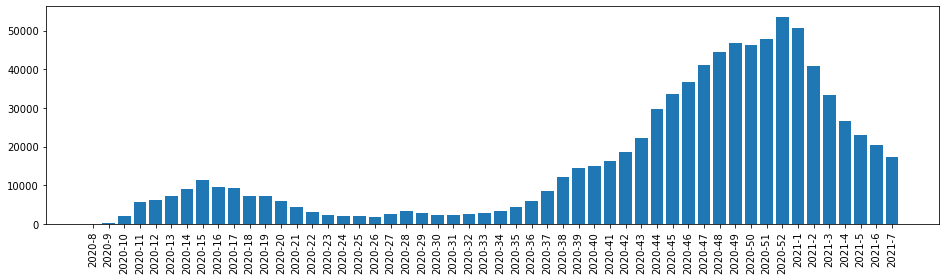

In [16]:
from matplotlib import pyplot as plt

xAxis = weeklyCaseCount['YearWeek']
yAxis = weeklyCaseCount['Region']
plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
plt.xticks(rotation=90)
plt.show()

The stuff below here is the original crap that can probably be removed.

In [ ]:
groupBy = ['Region', 'Gender','Age group']
totalCases = covid19.groupby(groupBy)[['Region']].count()
totalCases.rename(columns = {'Region':'Cases'}, inplace = True)

totalDeaths = covid19.loc[covid19['Death']==1].groupby(groupBy)[['Region']].count()
totalDeaths.rename(columns = {'Region':'Deaths'}, inplace = True) 

notHospitalized = covid19.loc[covid19['Hospital status']==3].groupby(groupBy)[['Region']].count()
notHospitalized.rename(columns = {'Region':'Not Hospitalized'}, inplace = True) 

hospitalized = covid19.loc[(covid19['Hospital status'].isin([1,2]))].groupby(groupBy)[['Region']].count()
hospitalized.rename(columns = {'Region':'Hospitalized'}, inplace = True) 


regionGenderAgeGroup = pd.merge(totalCases, notHospitalized, on=groupBy, how='outer')
regionGenderAgeGroup = pd.merge(regionGenderAgeGroup, hospitalized, on=groupBy, how='outer')
regionGenderAgeGroup = pd.merge(regionGenderAgeGroup, totalDeaths, on=groupBy, how='outer')

regionGenderAgeGroup = regionGenderAgeGroup.fillna(0)

regionGenderAgeGroup['Deaths'] = regionGenderAgeGroup['Deaths'].astype(int)
regionGenderAgeGroup['Not Hospitalized'] = regionGenderAgeGroup['Not Hospitalized'].astype(int)
regionGenderAgeGroup['Hospitalized'] = regionGenderAgeGroup['Hospitalized'].astype(int)

regionGenderAgeGroup.head(10)

In [ ]:
regionGenderAgeGroup.to_csv('regionGenderAgeGroup.csv')

In [ ]:
# Number of cases
totalCases = covid19.groupby(['Gender','Age group','Region'])[['Region']].count()
totalCases.rename(columns = {'Region':'Cases'}, inplace = True) 
totalCases.head(50)




In [ ]:
# Number of cases
totalCases = covid19.groupby(['Gender','Age group'])[['Region']].count()
totalCases.rename(columns = {'Region':'Cases'}, inplace = True) 
totalCases.head(50)

In [ ]:
# Number of deaths 
totalDeaths = covid19.loc[covid19['Death']==1].groupby(['Gender','Age group'])[['Region']].count()
totalDeaths.rename(columns = {'Region':'Deaths'}, inplace = True) 
totalDeaths.head(50)

In [ ]:
# Number NOT hospitalized
notHospitalized = covid19.loc[covid19['Hospital status']==3].groupby(['Gender','Age group'])[['Region']].count()
notHospitalized.rename(columns = {'Region':'Not Hospitalized'}, inplace = True) 
notHospitalized.head(50)

In [ ]:
# Hospitalized in the ICU or not in the ICU ... 
hospitalized = covid19.loc[(covid19['Hospital status']==1) | (covid19['Hospital status']==2)].groupby(['Gender','Age group'])[['Region']].count()
hospitalized.rename(columns = {'Region':'Hospitalized'}, inplace = True) 
hospitalized.head(50)

In [ ]:
genderAge = pd.merge(totalCases, notHospitalized, on=['Gender','Age group'], how='outer')
genderAge = pd.merge(genderAge, hospitalized, on=['Gender','Age group'], how='outer')
genderAge = pd.merge(genderAge, totalDeaths, on=['Gender','Age group'], how='outer')

genderAge = genderAge.fillna(0)

genderAge['Hospitalized'] = genderAge['Hospitalized'].astype(int)
genderAge['Deaths'] = genderAge['Deaths'].astype(int)

genderAge['% Not Hospitalized'] = (genderAge['Not Hospitalized'] / genderAge['Cases']) * 100
genderAge['% Hospitalized'] = (genderAge['Hospitalized'] / genderAge['Cases']) * 100
genderAge['% Deaths'] = (genderAge['Deaths'] / genderAge['Cases']) * 100

genderAge.head(50)

In [ ]:
# Cases 	Not Hospitalized 	Hospitalized 	Deaths 	% Not Hospitalized 	% Hospitalized 	% Deaths
genderAge2 = genderAge[['Cases', 'Not Hospitalized', '% Not Hospitalized', 'Hospitalized', '% Hospitalized', 'Deaths', '% Deaths']] 
genderAge2.head(50)

In [ ]:
covid19.describe()

Create dictionaries for some of the numeric fields.

In [ ]:
region = { 1:'Atlantic (New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland and Labrador)', 2:'Quebec', 3:'Ontario and Nunavut', 4:'Prairies (Manitoba, Saskatchewan, Alberta) and the Northwest Territories', 5:'British Columbia and Yukon'}
gender = {1:'Male', 2:'Female', 9:'Not Stated/Other'}
ageGroup = {1:'0-19', 2:'20-29', 3:'30-39', 4:'40-49', 5:'50-59', 6:'60-69', 7:'70-79', 8:'80+', 99:'Not Stated'}
occupation = {1:'Health Care Worker', 2:'School or daycare worker/attendee', 3:'Long Term Care Resident', 4:'Other', 9:'Not Stated'}
asymptomatic = {1:'Yes', 2:'No', 9:'Not Stated'}
sympton = {1:'Yes', 2:'No', 9:'Not Stated'}
hospitalStatus = {1:'Hospitalized - ICU', 2:'Hospitalized - Non-ICU', 3:'Not Hospitalized', 9:'Not Stated/Unknown'}
recovered = {1:'Yes', 2:'No', 9:'Not Stated/Unknown'}
death = {1:'Yes', 2:'No', 9:'Not Stated'}
transmission = {1:'Domestic Acquisition: “Contact of COVID Case” or “Contact with traveler” or “Unknown Source”', 2:'International Travel', 9:'Not Stated/Pending'}

In [ ]:
allMales = covid19.loc[covid19['Gender']==1]
allFemales = covid19.loc[covid19['Gender']==2]
allGenderNotstated = covid19.loc[covid19['Gender']==9]
malesCount = len(allMales)
femalesCount = len(allFemales)
genderNotstatedCount = len(allGenderNotstated)

In [ ]:
len(covid19) - (malesCount + femalesCount) == genderNotstatedCount

In [ ]:
allMales['Row1'] = 1

In [ ]:
allMales.head(25)

In [ ]:
allMales.groupby('Age group').sum()

In [ ]:
allMales.groupby('Age group').count()

In [ ]:
allMales.groupby(['Gender','Age group']).count()